# Amazon Product Reviews Sentiment Analysis


## Objective
- Predict sentiment (positive, neutral, negative) from Amazon product reviews using machine learning.
- Evaluate model performance and interpret important features.


In [1]:
!pip install pandas
!pip install numpy
!pip install scikit-learn
!pip install nltk
!pip install matplotlib



[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score


## Data Overview
- Number of reviews: 1597


In [3]:
df = pd.read_csv('amazon_product_reviews.csv')
print(df.head())
print(df.columns)


                     id       asins   brand                  categories  \
0  AVpe7AsMilAPnD_xQ78G  B00QJDU3KY  Amazon  Amazon Devices,mazon.co.uk   
1  AVpe7AsMilAPnD_xQ78G  B00QJDU3KY  Amazon  Amazon Devices,mazon.co.uk   
2  AVpe7AsMilAPnD_xQ78G  B00QJDU3KY  Amazon  Amazon Devices,mazon.co.uk   
3  AVpe7AsMilAPnD_xQ78G  B00QJDU3KY  Amazon  Amazon Devices,mazon.co.uk   
4  AVpe7AsMilAPnD_xQ78G  B00QJDU3KY  Amazon  Amazon Devices,mazon.co.uk   

  colors             dateAdded           dateUpdated  \
0    NaN  2016-03-08T20:21:53Z  2017-07-18T23:52:58Z   
1    NaN  2016-03-08T20:21:53Z  2017-07-18T23:52:58Z   
2    NaN  2016-03-08T20:21:53Z  2017-07-18T23:52:58Z   
3    NaN  2016-03-08T20:21:53Z  2017-07-18T23:52:58Z   
4    NaN  2016-03-08T20:21:53Z  2017-07-18T23:52:58Z   

                  dimension  ean                         keys  ...  \
0  169 mm x 117 mm x 9.1 mm  NaN  kindlepaperwhite/b00qjdu3ky  ...   
1  169 mm x 117 mm x 9.1 mm  NaN  kindlepaperwhite/b00qjdu3ky  ...   
2 

In [11]:
print("Number of reviews:", df.shape[0])


Number of reviews: 1597


## Workflow & Steps

In [4]:
#SENTIMENT MAPPING 
# Map ratings to sentiment classes
def sentiment_label(rating):
    if rating >= 4:
        return 'positive'
    elif rating == 3:
        return 'neutral'
    else:
        return 'negative'

df['sentiment'] = df['reviews.rating'].apply(sentiment_label)
print(df['sentiment'].value_counts())


sentiment
positive    977
negative    496
neutral     124
Name: count, dtype: int64


In [5]:
#TEXT CLEANING
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = str(text).lower()
    text = re.sub(r'[^a-z0-9\s]', '', text)
    words = text.split()
    words = [w for w in words if w not in stop_words]
    return ' '.join(words)

df['clean_review'] = df['reviews.text'].apply(clean_text)
print(df['clean_review'].head())


0    initially trouble deciding paperwhite voyage r...
1    allow preface little history casual reader own...
2    enjoying far great reading original fire since...
3    bought one first paperwhites pleased constant ...
4    say upfront dont like coroporate hermetically ...
Name: clean_review, dtype: object


[nltk_data] Downloading package stopwords to C:\Users\pravya
[nltk_data]     poojari\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [6]:
#FEATURE EXTRACTION
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(df['clean_review'])
y = df['sentiment']


In [7]:
#Train-Test Split and Model Training
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [8]:
#Prediction and Evaluation
# Predict and evaluate performance
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.7
              precision    recall  f1-score   support

    negative       0.56      0.64      0.60        92
     neutral       0.55      0.23      0.32        26
    positive       0.78      0.79      0.79       202

    accuracy                           0.70       320
   macro avg       0.63      0.55      0.57       320
weighted avg       0.70      0.70      0.69       320



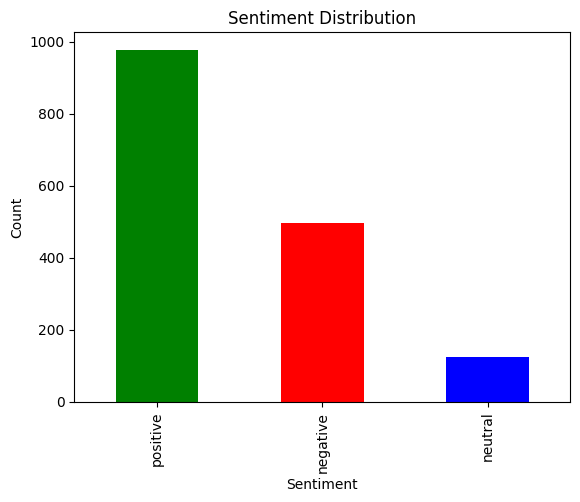

In [9]:
#Visualize Sentiment Distribution
df['sentiment'].value_counts().plot(kind='bar', color=['green', 'red', 'blue'])
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()


## Key Results

Test Accuracy: 0.7
Classification Report:
               precision    recall  f1-score   support

    negative       0.56      0.64      0.60        92
     neutral       0.55      0.23      0.32        26
    positive       0.78      0.79      0.79       202

    accuracy                           0.70       320
   macro avg       0.63      0.55      0.57       320
weighted avg       0.70      0.70      0.69       320



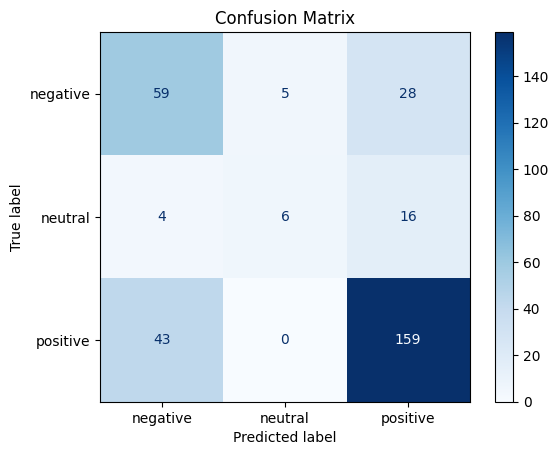


Top 10 words for negative:
['tv', 'kindle', 'movies', 'amazon', 'prime', 'br', 'netflix', 'weeks', 'terrible', 'return']

Top 10 words for neutral:
['cover', 'better', 'sound', 'doesnt', 'reviewer', 'need', 'tight', 'cheaper', 'good', 'hard']

Top 10 words for positive:
['tap', 'alexa', 'echo', 'great', 'perfect', 'love', 'loves', 'best', 'family', 'gift']


In [10]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score
import matplotlib.pyplot as plt
import numpy as np

# Print the accuracy score and classification report
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Show confusion matrix plot
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

# Show top words per sentiment class from logistic regression coefficients
feature_names = vectorizer.get_feature_names_out()
coefs = model.coef_

for i, class_label in enumerate(model.classes_):
    top_features = np.argsort(coefs[i])[-10:]
    print(f"\nTop 10 words for {class_label}:")
    print([feature_names[j] for j in top_features][::-1])


## Observations
- The model achieves a test accuracy of 70%.
- Precision, recall, and f1-score for positive reviews are higher than for neutral or negative.
- The confusion matrix shows that most errors occur between neutral and negative classes.
- Most predictive words for positive sentiment include "great", "perfect", "love", highlighting expected consumer satisfaction terms.


## Conclusion
- Logistic Regression with TF-IDF scoring achieved 70% accuracy.
- Text preprocessing including stopword removal improved model clarity.
- Future scope includes model tuning, additional features, and ensemble modeling.